In [72]:
using LinearAlgebra
using SparseArrays
using Plots
using Base.Threads
using Distributed
#potentiel
function V(x)
    return -20 * (exp(-30 * cos(pi * (x - 0.20))^2) + 2 * exp(-30 * cos(pi * (x + 0.25))^2))
end
    Nb = 100
    max_iterations = 1000
    tolerance = 1e-5
    dx = 1 / Nb

# Construction de la matrice hamiltonien
    x = LinRange(0, 1, Nb)
    diag_V = V.(x)
    main_diag = (1 / dx^2) .+ diag_V
    off_diag = fill(-1 / (2 * dx^2), Nb - 1)

    h = spdiagm(0 => main_diag, 1 => off_diag, -1 => off_diag)
    h[1, Nb] = h[Nb, 1] = -1 / (2 * dx^2)

    # Initialization
    eigvals, eigvecs = eigen(Matrix(h))
    sort_indices = sortperm(eigvals)
    phi = eigvecs[:, sort_indices]
    phi[:, 1] /= norm(phi[:, 1])
    P_0 = phi[:, 1] * phi[:, 1]'

function point_fixe(alpha, beta,P_0)
    P_old=P_0
    for k in 1:max_iterations
        H = h + (alpha / dx) * spdiagm(0 => diag(P_old))
        eigvals, eigvecs = eigen(Matrix(H))

        sort_indices = sortperm(eigvals)
        phi = eigvecs[:, sort_indices]
        phi[:, 1] /= norm(phi[:, 1])
        P_new = phi[:, 1] * phi[:, 1]'
        error = norm(P_new - P_old)

        if error < tolerance
            return k,P_old
        end

        P_old = beta * P_new + (1 - beta) * P_old
        P_0=P_old
    end
    return max_iterations,P_old
end

alpha_values = 50
beta_values = 0.1
iterations=point_fixe(alpha_values,beta_values,P_0)[1]
P_old=point_fixe(alpha_values,beta_values,P_0)[2]
P_old


100×100 Matrix{Float64}:
 0.00899881  0.00901157  0.00902704  …  0.00897474  0.00898056  0.00898854
 0.00901157  0.00902434  0.00903984     0.00898746  0.00899329  0.00900128
 0.00902704  0.00903984  0.00905536     0.00900289  0.00900873  0.00901673
 0.00904551  0.00905833  0.00907389     0.00902131  0.00902716  0.00903518
 0.00906732  0.00908018  0.00909577     0.00904306  0.00904893  0.00905697
 0.00909289  0.00910578  0.00912141  …  0.00906855  0.00907444  0.0090825
 0.00912267  0.00913561  0.00915129     0.00909826  0.00910417  0.00911226
 0.00915725  0.00917023  0.00918597     0.00913274  0.00913867  0.00914679
 0.00919726  0.0092103   0.00922611     0.00917264  0.0091786   0.00918676
 0.00924347  0.00925657  0.00927247     0.00921872  0.00922471  0.00923291
 0.00929673  0.00930991  0.0093259   …  0.00927185  0.00927787  0.00928611
 0.00935803  0.0093713   0.00938739     0.00933298  0.00933904  0.00934734
 0.00942841  0.00944178  0.009458       0.00940317  0.00940928  0.00941764
 

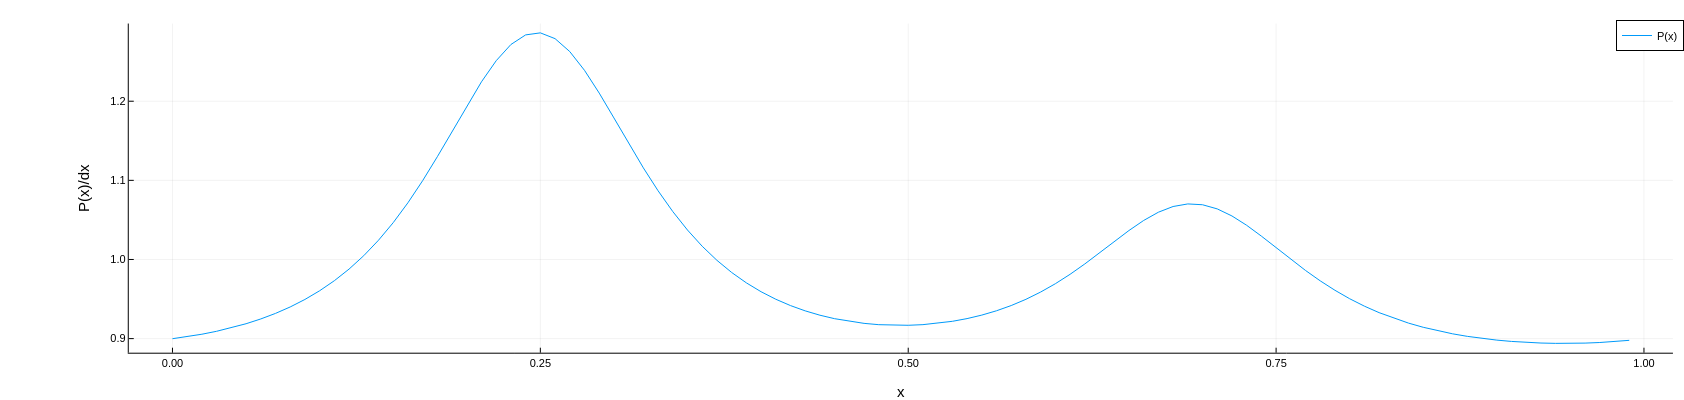

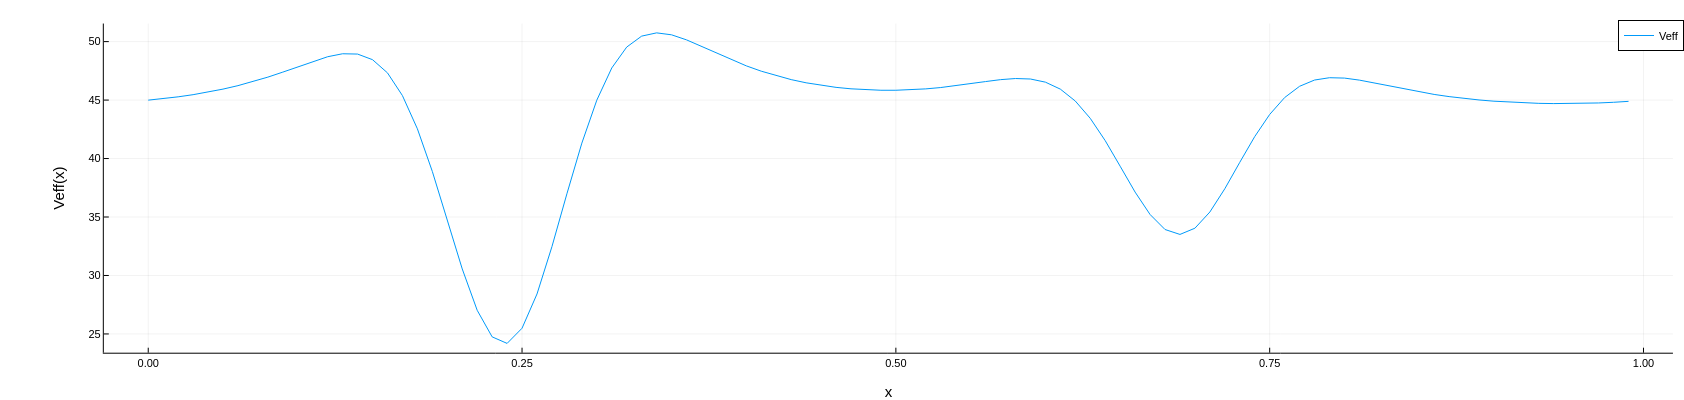

In [12]:
x_values = [(i-1)*dx for i in 1:Nb]
y_values = [(P_old[i, i] / dx) for i in 1:Nb]
z_values = [V(i*dx)+alpha_values*(P_old[i,i]/dx) for i in 1:Nb]

display(plot(x_values, y_values, label="P(x)", xlabel="x", ylabel="P(x)/dx"))
display(plot(x_values, z_values, label="Veff", xlabel="x", ylabel="Veff(x)"))

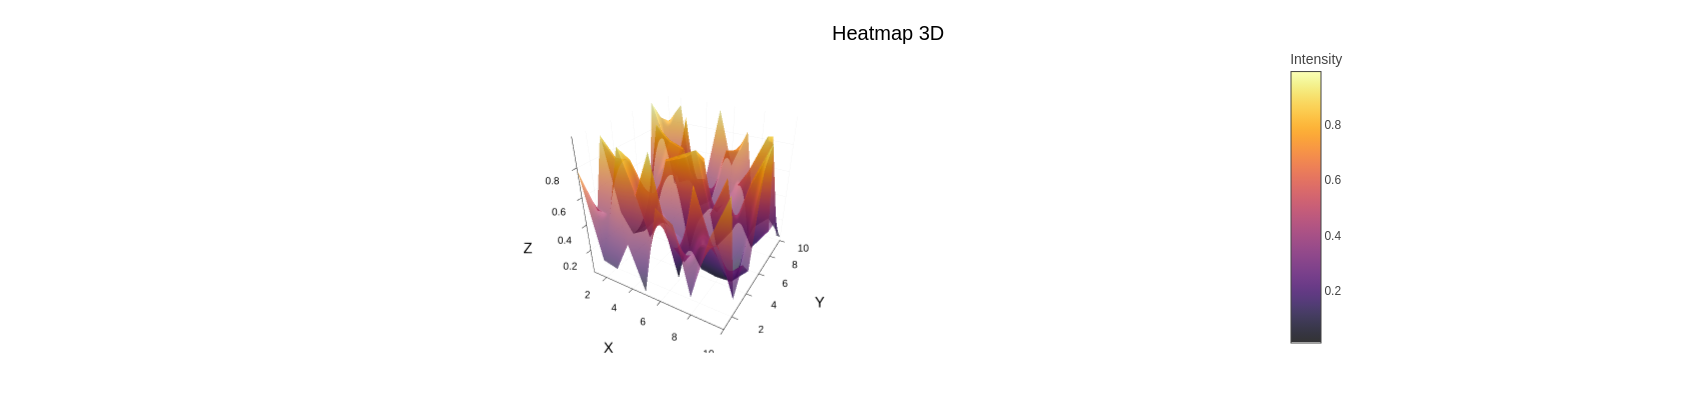

In [13]:
using Plots
using PlotlyJS

# Générer des données aléatoires pour la heatmap
x = 1:10
y = 1:10
z = rand(10, 10)  # Matrice de valeurs aléatoires

# Utilisation du backend PlotlyJS
plotlyjs()

# Créer la heatmap 3D
surface(x, y, z, opacity=0.8, colorbar_title="Intensity", xlabel="X", ylabel="Y", zlabel="Z", title="Heatmap 3D")


In [74]:
B=[]
for i in 1:length(alpha_values)
    beta_min_indices = argmin(iterations[i, :], dims=1)
    beta_min = beta_values[beta_min_indices[1]]  
    println("alpha: $(alpha_values[i]), beta_min: $(beta_min)")
    push!(B,beta_min)
end


alpha: 0, beta_min: 0.01
alpha: 2, beta_min: 0.49
alpha: 4, beta_min: 0.49
alpha: 6, beta_min: 0.49
alpha: 8, beta_min: 0.49
alpha: 10, beta_min: 0.49
alpha: 12, beta_min: 0.49
alpha: 14, beta_min: 0.49
alpha: 16, beta_min: 0.47
alpha: 18, beta_min: 0.45
alpha: 20, beta_min: 0.41
alpha: 22, beta_min: 0.39
alpha: 24, beta_min: 0.39
alpha: 26, beta_min: 0.37
alpha: 28, beta_min: 0.35
alpha: 30, beta_min: 0.33
alpha: 32, beta_min: 0.33
alpha: 34, beta_min: 0.31
alpha: 36, beta_min: 0.31
alpha: 38, beta_min: 0.31
alpha: 40, beta_min: 0.29
alpha: 42, beta_min: 0.27
alpha: 44, beta_min: 0.27
alpha: 46, beta_min: 0.25
alpha: 48, beta_min: 0.25
alpha: 50, beta_min: 0.25


Alpha: 0 - Beta: 0.01 - Iterations: 1.0
Alpha: 0 - Beta: 0.03 - Iterations: 1.0
Alpha: 0 - Beta: 0.05 - Iterations: 1.0
Alpha: 0 - Beta: 0.07 - Iterations: 1.0
Alpha: 0 - Beta: 0.09 - Iterations: 1.0
Alpha: 0 - Beta: 0.11 - Iterations: 1.0
Alpha: 0 - Beta: 0.13 - Iterations: 1.0
Alpha: 0 - Beta: 0.15 - Iterations: 1.0
Alpha: 0 - Beta: 0.17 - Iterations: 1.0
Alpha: 0 - Beta: 0.19 - Iterations: 1.0
Alpha: 0 - Beta: 0.21 - Iterations: 1.0
Alpha: 0 - Beta: 0.23 - Iterations: 1.0
Alpha: 0 - Beta: 0.25 - Iterations: 1.0
Alpha: 0 - Beta: 0.27 - Iterations: 1.0
Alpha: 0 - Beta: 0.29 - Iterations: 1.0
Alpha: 0 - Beta: 0.31 - Iterations: 1.0
Alpha: 0 - Beta: 0.33 - Iterations: 1.0
Alpha: 0 - Beta: 0.35 - Iterations: 1.0
Alpha: 0 - Beta: 0.37 - Iterations: 1.0
Alpha: 0 - Beta: 0.39 - Iterations: 1.0
Alpha: 0 - Beta: 0.41 - Iterations: 1.0
Alpha: 0 - Beta: 0.43 - Iterations: 1.0
Alpha: 0 - Beta: 0.45 - Iterations: 1.0
Alpha: 0 - Beta: 0.47 - Iterations: 1.0
Alpha: 0 - Beta: 0.49 - Iterations: 1.0


WebIO._IJuliaInit()

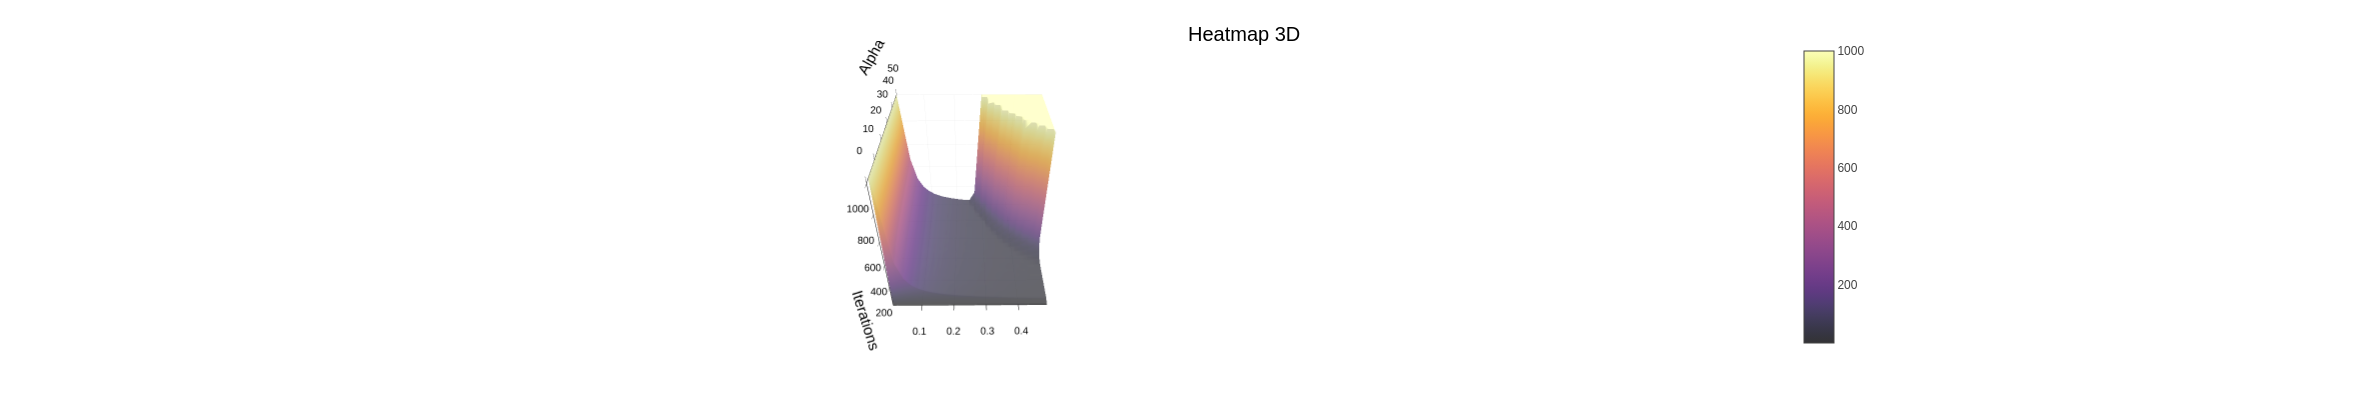

In [4]:
using LinearAlgebra
using SparseArrays
using Plots
using Base.Threads
using Distributed
#potentiel
function V(x)
    return -20 * (exp(-30 * cos(pi * (x - 0.20))^2) + 2 * exp(-30 * cos(pi * (x + 0.25))^2))
end
    Nb = 100
    max_iterations = 1000
    tolerance = 1e-7
    dx = 1 / Nb

# Construction de la matrice hamiltonien
    x = LinRange(0, 1, Nb)
    diag_V = V.(x)
    main_diag = (1 / dx^2) .+ diag_V
    off_diag = fill(-1 / (2 * dx^2), Nb - 1)

    h = spdiagm(0 => main_diag, 1 => off_diag, -1 => off_diag)
    h[1, Nb] = h[Nb, 1] = -1 / (2 * dx^2)

    # Initialization
    eigvals, eigvecs = eigen(Matrix(h))
    sort_indices = sortperm(eigvals)
    phi = eigvecs[:, sort_indices]
    phi[:, 1] /= norm(phi[:, 1])
    P_0 = phi[:, 1] * phi[:, 1]'

function point_fixe(alpha, beta,P_0)
    P_old=P_0
    for k in 1:max_iterations
        H = h + (alpha / dx) * spdiagm(0 => diag(P_old))
        eigvals, eigvecs = eigen(Matrix(H))

        sort_indices = sortperm(eigvals)
        phi = eigvecs[:, sort_indices]
        phi[:, 1] /= norm(phi[:, 1])
        P_new = phi[:, 1] * phi[:, 1]'
        error = norm(P_new - P_old)

        if error < tolerance
            return k
        end

        P_old = beta * P_new + (1 - beta) * P_old
        P_0=P_old
    end
    return max_iterations
end

alpha_values = 0:2:50
beta_values = 0.01:0.02:0.5

iterations = zeros(length(alpha_values), length(beta_values))

@threads for i in 1:length(alpha_values)
    alpha = alpha_values[i]
    for j in 1:length(beta_values)
        beta = beta_values[j]
        iterations[i, j] = point_fixe(alpha, beta,P_0)
        println("Alpha: ", alpha, " - Beta: ", beta, " - Iterations: ", iterations[i, j])
    end
end
plotlyjs()
# Affichage de la heatmap en 3D avec surface()
surface(beta_values, alpha_values , iterations, opacity=0.8, xlabel="Beta", ylabel="Alpha", zlabel="Iterations", title="Heatmap 3D")

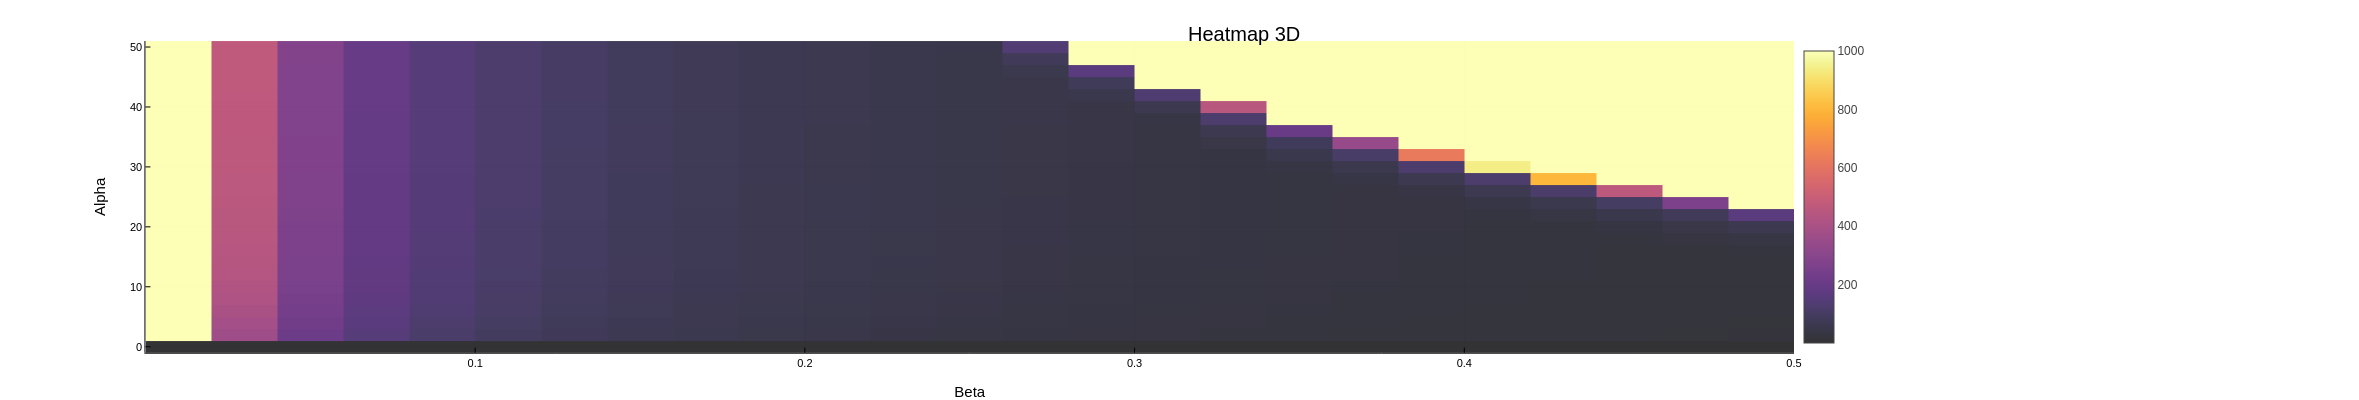

In [65]:
heatmap(beta_values, alpha_values , iterations, opacity=0.8, xlabel="Beta", ylabel="Alpha", zlabel="Iterations", title="Heatmap 3D")

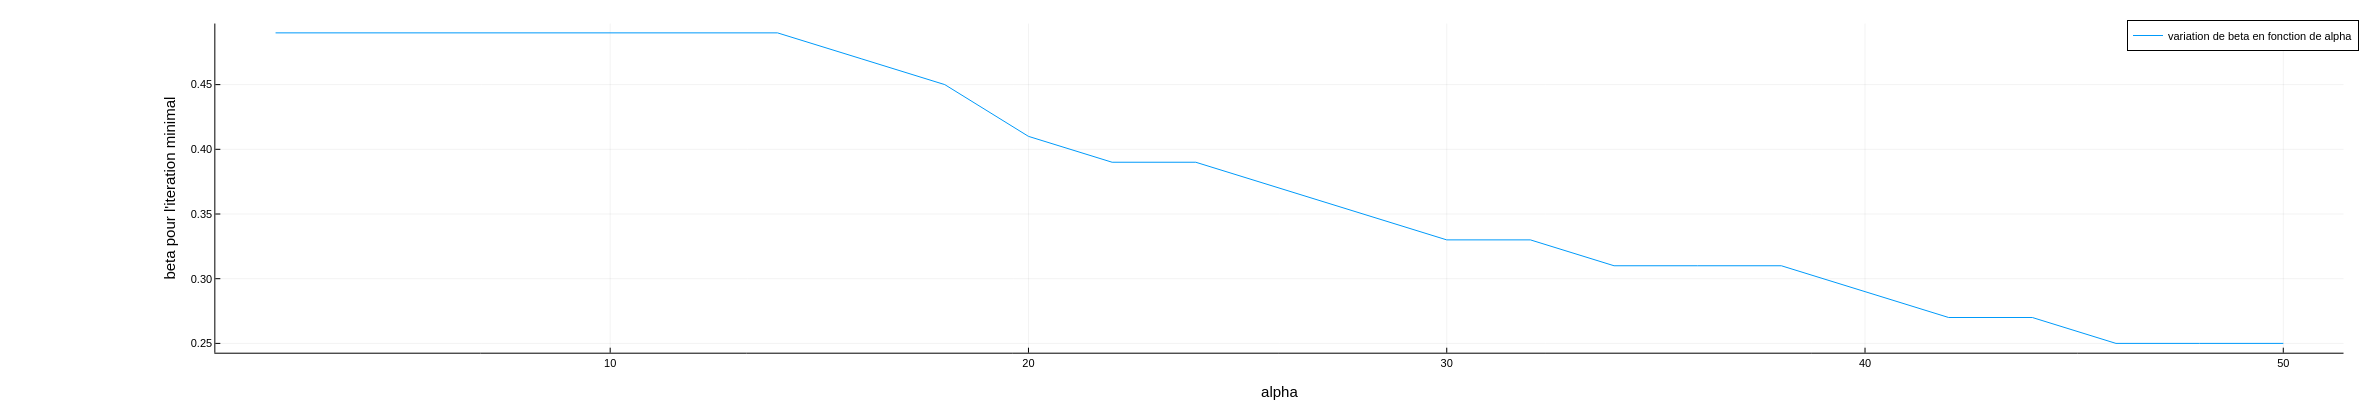

In [23]:
B=[]
for i in 1:length(alpha_values)
    beta_min_indices = argmin(iterations[i, :])
    beta_min=beta_values[beta_min_indices]
    push!(B,beta_min)
end
Bb=B[2:end]
aa=alpha_values[2:end]
plot(aa,Bb, xlabel="alpha",ylabel="beta pour l'iteration minimal",label="variation de beta en fonction de alpha")

In [1]:
using IterativeSolvers
function inverse_power_iteration(A)
    results = lobpcg(A, false, 1)
    v=results.X
    return v * v'
end

inverse_power_iteration (generic function with 1 method)

In [2]:
using LinearAlgebra
using SparseArrays
using Plots
using Base.Threads
using Distributed
#potentiel
function V(x)
    return -20 * (exp(-30 * cos(pi * (x - 0.20))^2) + 2 * exp(-30 * cos(pi * (x + 0.25))^2))
end
    Nb = 100
    max_iterations = 1000
    tolerance = 1e-7
    dx = 1 / Nb
# Construction de la matrice hamiltonien
    x = LinRange(0, 1, Nb)
    diag_V = V.(x)
    main_diag = (1 / dx^2) .+ diag_V
    off_diag = fill(-1 / (2 * dx^2), Nb - 1)

    h = spdiagm(0 => main_diag, 1 => off_diag, -1 => off_diag)
    h[1, Nb] = h[Nb, 1] = -1 / (2 * dx^2)
    h=Matrix(h)
    P_0 = inverse_power_iteration(h)

function point_fixe(alpha, beta,P_0)
    P_old=P_0
    for k in 1:max_iterations
        H = h + (alpha / dx) * spdiagm(0 => diag(P_old))
        H=Matrix(H)
        P_new = inverse_power_iteration(H)
        error = norm(P_new - P_old)

        if error < tolerance
            return k
        end

        P_old = beta * P_new + (1 - beta) * P_old
        P_0=P_old
    end
    return max_iterations
end

alpha_values = 0:2:50
beta_values = 0.01:0.02:0.5

iterations = zeros(length(alpha_values), length(beta_values))

@threads for i in 1:length(alpha_values)
    alpha = alpha_values[i]
    for j in 1:length(beta_values)
        beta = beta_values[j]
        iterations[i, j] = point_fixe(alpha, beta,P_0)
        println("Alpha: ", alpha, " - Beta: ", beta, " - Iterations: ", iterations[i, j])
    end
end
plotlyjs()
# Affichage de la heatmap en 3D avec surface()
surface(beta_values, alpha_values , iterations, opacity=0.8, xlabel="Beta", ylabel="Alpha", zlabel="Iterations", title="Heatmap 3D")

Alpha: 0 - Beta: 0.01 - Iterations: 61.0
Alpha: 0 - Beta: 0.03 - Iterations: 42.0
Alpha: 0 - Beta: 0.05 - Iterations: 59.0
Alpha: 0 - Beta: 0.07 - Iterations: 25.0
Alpha: 0 - Beta: 0.09 - Iterations: 23.0
Alpha: 0 - Beta: 0.11 - Iterations: 25.0
Alpha: 0 - Beta: 0.13 - Iterations: 17.0
Alpha: 0 - Beta: 0.15 - Iterations: 5.0
Alpha: 0 - Beta: 0.17 - Iterations: 24.0
Alpha: 0 - Beta: 0.19 - Iterations: 11.0
Alpha: 0 - Beta: 0.21 - Iterations: 4.0
Alpha: 0 - Beta: 0.23 - Iterations: 21.0
Alpha: 0 - Beta: 0.25 - Iterations: 7.0
Alpha: 0 - Beta: 0.27 - Iterations: 6.0
Alpha: 0 - Beta: 0.29 - Iterations: 6.0
Alpha: 0 - Beta: 0.31 - Iterations: 16.0
Alpha: 0 - Beta: 0.33 - Iterations: 3.0
Alpha: 0 - Beta: 0.35 - Iterations: 52.0
Alpha: 0 - Beta: 0.37 - Iterations: 21.0
Alpha: 0 - Beta: 0.39 - Iterations: 6.0
Alpha: 0 - Beta: 0.41 - Iterations: 7.0
Alpha: 0 - Beta: 0.43 - Iterations: 6.0
Alpha: 0 - Beta: 0.45 - Iterations: 4.0
Alpha: 0 - Beta: 0.47 - Iterations: 17.0
Alpha: 0 - Beta: 0.49 - It

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mpartialsortperm![22m[0m[1m([22m[90mix[39m::[0mSubArray[90m{Int64, 1, Vector{Int64}, Tuple{UnitRange{Int64}}, true}[39m, [90mv[39m::[0mVector[90m{Float64}[39m, [90mk[39m::[0mUnitRange[90m{Int64}[39m; [90mlt[39m::[0mFunction, [90mby[39m::[0mFunction, [90mrev[39m::[0mBool, [90morder[39m::[0mBase.Order.ForwardOrdering, [90minitialized[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [90mBase.Sort[39m [90m./[39m[90m[4msort.jl:1567[24m[39m
      [2] [0m[1mpartialsortperm![22m
    [90m    @[39m [90m./[39m[90m[4msort.jl:1567[24m[39m[90m [inlined][39m
      [3] [0m[1msub_problem![22m[0m[1m([22m[90miterator[39m::[0mLOBPCGIterator[90m{false, Float64, Matrix{Float64}, Nothing, Vector{Float64}, Vector{Float64}, Vector{Int64}, Matrix{Float64}, IterativeSolvers.Blocks{false, Float64, Matrix{Float64}}, IterativeSolvers.CholQR{Matrix{Float64}}, IterativeSolvers.RPreconditioner{Nothing, Float64, Matrix{Float64}}, IterativeSolvers.Constraint{Nothing, Matrix{Nothing}, Matrix{Nothing}, Nothing}, IterativeSolvers.BlockGram{false, Matrix{Float64}}, Vector{Bool}, Vector{IterativeSolvers.LOBPCGState{Vector{Float64}, Vector{Float64}}}}[39m, [90msizeX[39m::[0mInt64, [90mbs1[39m::[0mInt64, [90mbs2[39m::[0mInt64[0m[1m)[22m
    [90m    @[39m [35mIterativeSolvers[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:623[24m[39m
      [4] [0m[1m(::LOBPCGIterator{false, Float64, Matrix{Float64}, Nothing, Vector{Float64}, Vector{Float64}, Vector{Int64}, Matrix{Float64}, IterativeSolvers.Blocks{false, Float64, Matrix{Float64}}, IterativeSolvers.CholQR{Matrix{Float64}}, IterativeSolvers.RPreconditioner{Nothing, Float64, Matrix{Float64}}, IterativeSolvers.Constraint{Nothing, Matrix{Nothing}, Matrix{Nothing}, Nothing}, IterativeSolvers.BlockGram{false, Matrix{Float64}}, Vector{Bool}, Vector{IterativeSolvers.LOBPCGState{Vector{Float64}, Vector{Float64}}}})[22m[0m[1m([22m[90mresidualTolerance[39m::[0mFloat64, [90mlog[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mIterativeSolvers[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:737[24m[39m
      [5] [0m[1mlobpcg![22m[0m[1m([22m[90miterator[39m::[0mLOBPCGIterator[90m{false, Float64, Matrix{Float64}, Nothing, Vector{Float64}, Vector{Float64}, Vector{Int64}, Matrix{Float64}, IterativeSolvers.Blocks{false, Float64, Matrix{Float64}}, IterativeSolvers.CholQR{Matrix{Float64}}, IterativeSolvers.RPreconditioner{Nothing, Float64, Matrix{Float64}}, IterativeSolvers.Constraint{Nothing, Matrix{Nothing}, Matrix{Nothing}, Nothing}, IterativeSolvers.BlockGram{false, Matrix{Float64}}, Vector{Bool}, Vector{IterativeSolvers.LOBPCGState{Vector{Float64}, Vector{Float64}}}}[39m; [90mlog[39m::[0mBool, [90mmaxiter[39m::[0mInt64, [90mnot_zeros[39m::[0mBool, [90mtol[39m::[0mFloat64[0m[1m)[22m
    [90m    @[39m [35mIterativeSolvers[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:881[24m[39m
      [6] [0m[1mlobpcg![22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:865[24m[39m[90m [inlined][39m
      [7] [0m[1m#lobpcg#59[22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:838[24m[39m[90m [inlined][39m
      [8] [0m[1mlobpcg[22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:827[24m[39m[90m [inlined][39m
      [9] [0m[1mlobpcg[22m[0m[1m([22m[90mA[39m::[0mMatrix[90m{Float64}[39m, [90mB[39m::[0mNothing, [90mlargest[39m::[0mBool, [90mnev[39m::[0mInt64; [90mkwargs[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [35mIterativeSolvers[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:791[24m[39m
     [10] [0m[1mlobpcg[22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:790[24m[39m[90m [inlined][39m
     [11] [0m[1m#lobpcg#56[22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:788[24m[39m[90m [inlined][39m
     [12] [0m[1mlobpcg[22m
    [90m    @[39m [90m~/.julia/packages/IterativeSolvers/bjiMt/src/[39m[90m[4mlobpcg.jl:787[24m[39m[90m [inlined][39m
     [13] [0m[1minverse_power_iteration[22m[0m[1m([22m[90mA[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @[39m [36mMain[39m [90m./[39m[90m[4mIn[1]:3[24m[39m
     [14] [0m[1mpoint_fixe[22m[0m[1m([22m[90malpha[39m::[0mInt64, [90mbeta[39m::[0mFloat64, [90mP_0[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @[39m [36mMain[39m [90m./[39m[90m[4mIn[2]:30[24m[39m
     [15] [0m[1mmacro expansion[22m
    [90m    @[39m [90m./[39m[90m[4mIn[2]:52[24m[39m[90m [inlined][39m
     [16] [0m[1m(::var"#31#threadsfor_fun#2"{var"#31#threadsfor_fun#1#3"{UnitRange{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [36mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:215[24m[39m
     [17] [0m[1m#31#threadsfor_fun[22m
    [90m    @[39m [90m./[39m[90m[4mthreadingconstructs.jl:182[24m[39m[90m [inlined][39m
     [18] [0m[1m(::Base.Threads.var"#1#2"{var"#31#threadsfor_fun#2"{var"#31#threadsfor_fun#1#3"{UnitRange{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:154[24m[39m

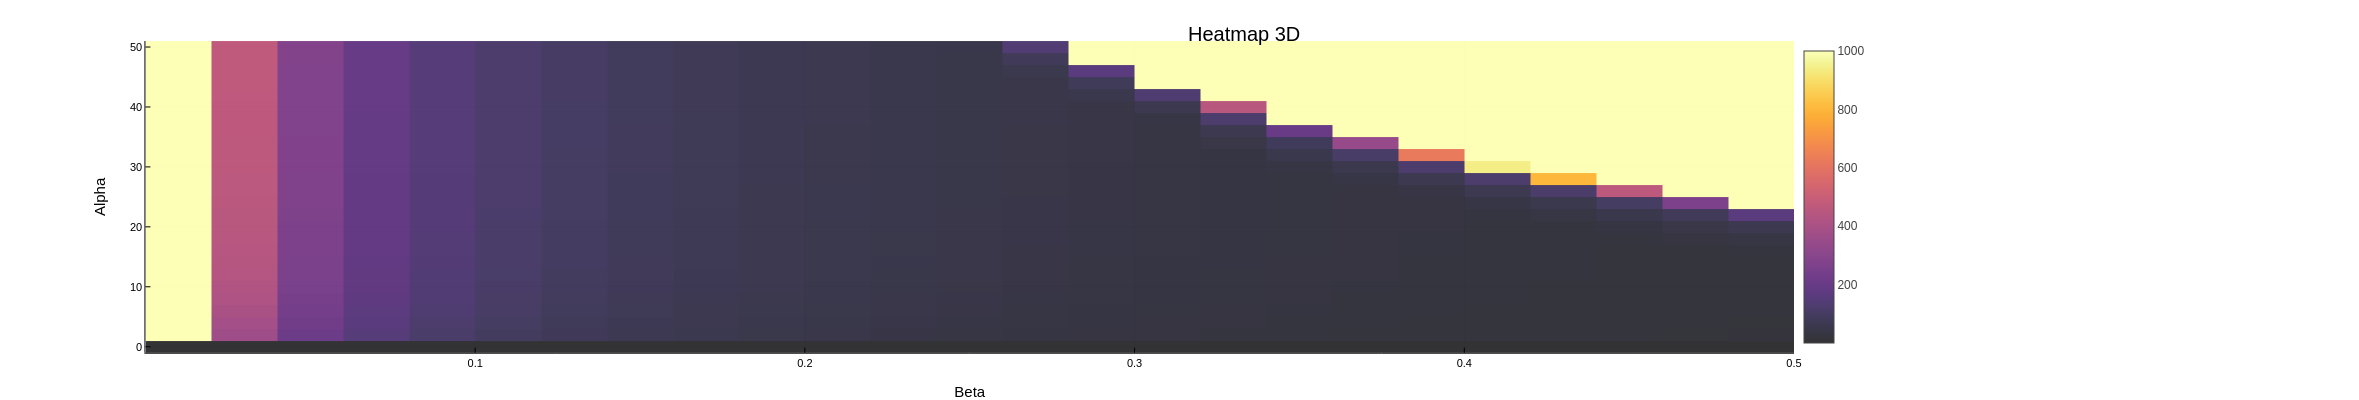

In [64]:
heatmap(beta_values, alpha_values , iterations, opacity=0.8, xlabel="Beta", ylabel="Alpha", zlabel="Iterations", title="Heatmap 3D")

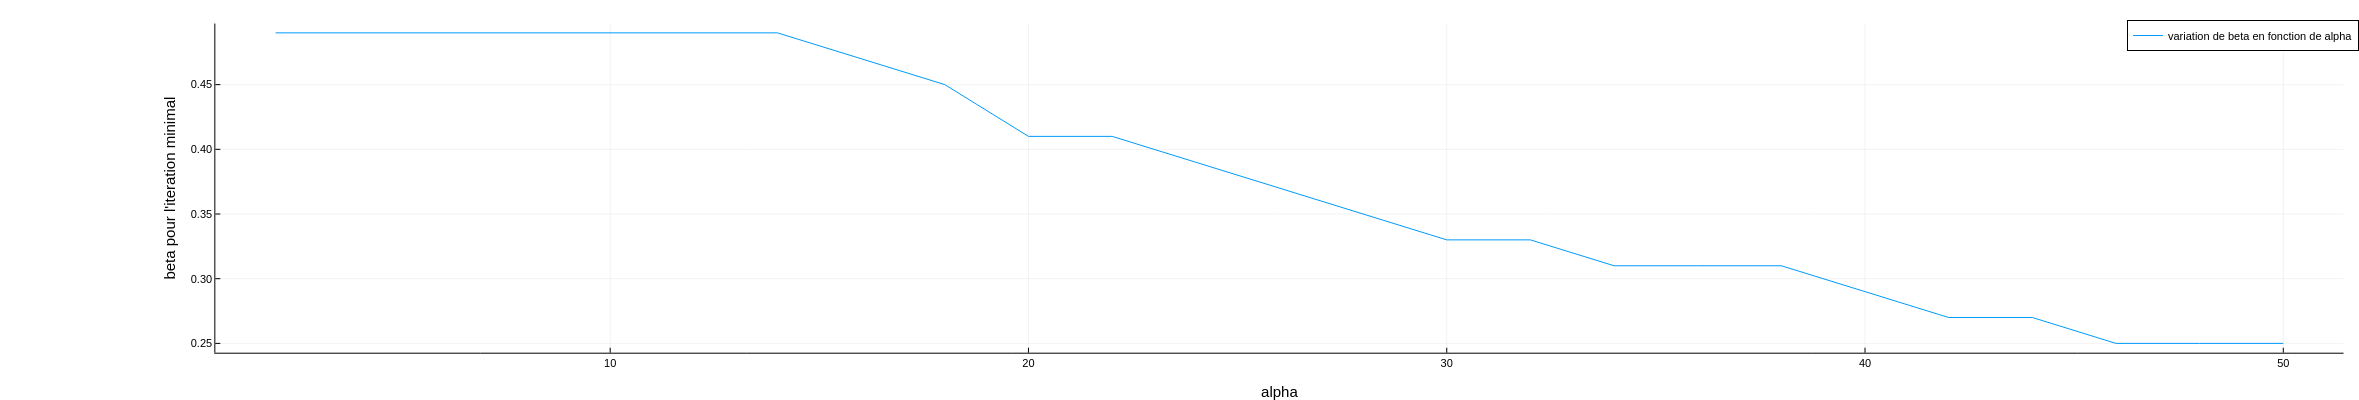

In [63]:
B=[]
for i in 1:length(alpha_values)
    beta_min_indices = argmin(iterations[i, :])
    beta_min=beta_values[beta_min_indices]
    push!(B,beta_min)
end
Bb=B[2:end]
aa=alpha_values[2:end]
plot(aa,Bb, xlabel="alpha",ylabel="beta pour l'iteration minimal",label="variation de beta en fonction de alpha")

In [2]:
using LinearMaps

# Exemple de matrices P_star et H
P_star = [1.0 0.0; 0.0 1.0]
H = [0.0 1.0; 1.0 0.0]

# Définir la fonction omega
function omega(X::AbstractMatrix{T}, P::AbstractMatrix{T}, H::AbstractMatrix{T}) where T
    n = size(P, 1)
    om = P * X * (I - P) * H - H * P * X * (I - P)
    omega = om + om'
    return omega
end

# Définir une fonction qui prend X et applique omega avec P_star et H
omega_func = X -> omega(X, P_star, H)

# Créer un LinearMap avec cette fonction
omega_map = LinearMap(omega_func)

# Exemple d'utilisation avec une matrice X
X_example = [0.5 0.5; 0.5 0.5]
result = omega_map * X_example

println(result)

LoadError: MethodError: no method matching LinearMap(::var"#1#2")

[0mClosest candidates are:
[0m  LinearMap(::Any, [91m::Any[39m, [91m::Int64[39m, [91m::Int64[39m; kwargs...)
[0m[90m   @[39m [35mLinearMaps[39m [90m~/.julia/packages/LinearMaps/AWz3y/src/[39m[90m[4mLinearMaps.jl:407[24m[39m
[0m  LinearMap(::Any, [91m::Int64[39m, [91m::Int64[39m; kwargs...)
[0m[90m   @[39m [35mLinearMaps[39m [90m~/.julia/packages/LinearMaps/AWz3y/src/[39m[90m[4mLinearMaps.jl:405[24m[39m
[0m  LinearMap(::Any, [91m::Any[39m, [91m::Int64[39m; kwargs...)
[0m[90m   @[39m [35mLinearMaps[39m [90m~/.julia/packages/LinearMaps/AWz3y/src/[39m[90m[4mLinearMaps.jl:406[24m[39m
[0m  ...


In [10]:
using SparseArrays
using iterative
using LinearAlgebra
using IterativeSolvers
# Create the diagonal matrix C
diagonal_values = 1:100
C = spdiagm(0 => diagonal_values)

# Initial guess: Identity matrix
X = Matrix(I, 100, 100)
C=Matrix(C)
r=lobpcg(C, false, 1)


LoadError: ArgumentError: Package iterative not found in current path.
- Run `import Pkg; Pkg.add("iterative")` to install the iterative package.